In [1]:
import pandas as pd
model_df=pd.read_csv("dumpster_project_clean_data_dec16.csv")

D:\anacondasetup\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
model_df.columns

Index(['price_price_deals', 'customer_tons_include_price',
       'price_days_included', 'price_yards', 'order_date', 'date_entered',
       'customer_waste', 'customer_days_include', 'customer_cost_per_ton',
       'date_modified', 'customer_cost_per_day', 'customer_city', 'status',
       'customer_zip', 'customer_sub_total', 'customer_delivery_date',
       'customer_container_size', 'price_haul', 'customer_state', 'hauler_id',
       'price_tons_included', 'id'],
      dtype='object')

In [3]:
import pandas as pd

model_df=pd.read_csv("dumpster_project_clean_data_dec16.csv")


for col in ["customer_delivery_date", "order_date","date_entered", "date_modified"]:
    model_df[col]=pd.to_datetime(model_df[col])
    
temp_df = model_df

import numpy as np

for col in model_df.columns:
    try:
        temp_df.loc[temp_df[col]>temp_df[col].quantile(0.999),col]=np.nan
    except:
        print (col)
        pass

D:\anacondasetup\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


price_price_deals
customer_waste
customer_city
status
customer_zip
customer_state
hauler_id
id


In [4]:
temp_df.head()

,price_price_deals,customer_tons_include_price,price_days_included,price_yards,order_date,date_entered,customer_waste,customer_days_include,customer_cost_per_ton,date_modified,...,status,customer_zip,customer_sub_total,customer_delivery_date,customer_container_size,price_haul,customer_state,hauler_id,price_tons_included,id
0,FF,NaN,7.0,20.0,2017-07-19,2017-07-19 11:01:12,Roofing,7.0,75.0,2017-08-18 12:51:22,...,Completed,37042,495.0,2017-07-24 00:00:00,20.0,NaN,TN,ce8f559c-c9be-49aa-ba75-596f74d57d70,NaN,1002c37b-b839-726e-d23b-596f748ba9d0
1,HT,4.0,3.0,20.0,2017-06-13,2017-06-13 14:18:08,Household,3.0,70.0,2017-06-21 10:30:49,...,Completed,60617,450.0,2017-06-14 00:00:00,20.0,175.00,IL,2f1cb178-2be3-a3f5-77c0-57f80f581de8,NaN,1005a2b0-f9e7-f123-081c-59402cc5462d
2,HWT,2.0,14.0,20.0,2017-01-03,2017-01-10 16:33:38,CandD,14.0,70.0,2017-03-01 14:39:36,...,Completed,48336,475.0,2017-01-11 00:00:00,20.0,360.00,CO,d6d3b3c8-86af-c61d-e9fa-586bd48a2078,50.0,100652b5-9132-2e4b-f0a6-587553ac4792
3,HWT,3.0,2.0,30.0,2018-11-08,2018-11-08 15:54:34,CandD,2.0,80.0,2018-11-08 16:56:31,...,Dispatched,32405,650.0,2018-11-09 00:00:00,30.0,560.00,FL,6f1beefb-23b0-2986-84aa-593703912995,3.0,1009b66d-3f6e-d997-addc-5be4a2886bda
4,HWT,1.0,20.0,30.0,2017-02-22,2017-02-22 08:25:28,Roofing,7.0,75.0,2017-02-24 14:51:26,...,Cancelled,75752,685.0,2017-02-24 12:00:00,30.0,595.38,TX,d4958c9c-ae40-e519-3c98-577c13e75a23,1.0,1009d169-a4d9-b9f1-2558-58ad91790d48


In [10]:
time_df=temp_df.loc[:, temp_df.columns.str.contains("date")]

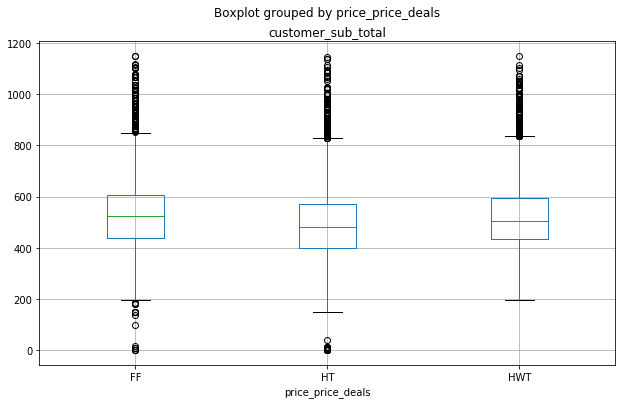

In [12]:
import matplotlib.pyplot as plt
temp_df.boxplot(column="customer_sub_total",by="price_price_deals", figsize=(10,6))
plt.show()

In [24]:
time_df.columns

Index(['order_date', 'date_entered', 'date_modified',
       'customer_delivery_date'],
      dtype='object')

In [22]:
time_df.date_modified.isnull().value_counts()

False    35478
True        36
Name: date_modified, dtype: int64

In [149]:
time_df=temp_df.loc[:, temp_df.columns.str.contains("date")]
from datetime import datetime

rows=['order_date', 'date_entered', 'date_modified',
       'customer_delivery_date']

for idx,item in enumerate(rows):
    for i in range(idx,len(rows)-1):
        time_df[("({})-({})".format(item,rows[i+1]))]=((time_df[rows[i+1]]-time_df[item]).dt.total_seconds())/86400#.dt.seconds
    

D:\anacondasetup\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
#time_df.to_csv("time_df.csv")

In [95]:
time_df.columns

Index(['order_date', 'date_entered', 'date_modified', 'customer_delivery_date',
       '(order_date)-(date_entered)', '(order_date)-(date_modified)',
       '(order_date)-(customer_delivery_date)',
       '(date_entered)-(date_modified)',
       '(date_entered)-(customer_delivery_date)',
       '(date_modified)-(customer_delivery_date)'],
      dtype='object')

In [154]:
#time_df["date_modified_0_1"][time_df["date_modified_0_1"]<1]=0

In [150]:
pd.set_option('display.max_rows',10000)
time_df.sample(5)

,order_date,date_entered,date_modified,customer_delivery_date,(order_date)-(date_entered),(order_date)-(date_modified),(order_date)-(customer_delivery_date),(date_entered)-(date_modified),(date_entered)-(customer_delivery_date),(date_modified)-(customer_delivery_date)
11299,2018-06-12,2018-06-12 14:05:31,2018-10-23 16:45:10,2018-06-14,0.587164,133.698032,2.0,133.110868,1.412836,-131.698032
18966,2017-08-21,2017-08-21 13:51:04,2017-08-28 14:09:56,2017-08-22,0.577130,7.590231,1.0,7.013102,0.422870,-6.590231
9800,2017-08-03,2017-08-03 16:17:06,2017-08-14 11:38:53,2017-08-11,0.678542,11.485336,8.0,10.806794,7.321458,-3.485336
531,2018-07-23,2018-07-23 11:44:56,2018-07-26 11:28:36,2018-07-25,0.489537,3.478194,2.0,2.988657,1.510463,-1.478194
26572,2018-05-15,2018-05-15 09:10:03,2018-05-23 16:32:45,2018-05-16,0.381979,8.689410,1.0,8.307431,0.618021,-7.689410


In [152]:
time_df.to_csv("time_df.csv")

In [151]:
time_df["date_modified"].isna().sum()#[time_df["date_modified"].isnull()==True].


36

In [147]:
time_df["(date_entered)-(date_modified)"][time_df["(date_entered)-(date_modified)"]<1].count()

3481

In [153]:
#time_df["(date_entered)-(date_modified)"][time_df["(date_entered)-(date_modified)"]<1]=0

In [111]:
time_df.iloc[0,5].total_seconds()

2638282.0

In [213]:
temp_df.price_price_deals.unique()

array(['FF', 'HT', 'HWT', nan], dtype=object)

In [157]:
temp_df.columns

Index(['price_price_deals', 'customer_tons_include_price',
       'price_days_included', 'price_yards', 'order_date', 'date_entered',
       'customer_waste', 'customer_days_include', 'customer_cost_per_ton',
       'date_modified', 'customer_cost_per_day', 'customer_city', 'status',
       'customer_zip', 'customer_sub_total', 'customer_delivery_date',
       'customer_container_size', 'price_haul', 'customer_state', 'hauler_id',
       'price_tons_included', 'id'],
      dtype='object')

In [167]:
temp_df.loc[:,['customer_tons_include_price','customer_container_size','customer_sub_total','price_haul']].sample(10)

,customer_tons_include_price,customer_container_size,customer_sub_total,price_haul
1239,1.0,10.0,460.0,360.0
33081,3.0,20.0,495.0,375.0
20791,10.0,30.0,495.0,200.0
443,1.0,10.0,390.0,275.0
17133,2.0,10.0,420.0,315.0
22055,3.5,40.0,650.0,550.0
17087,2.0,20.0,550.0,NaN
16946,1.0,10.0,815.0,NaN
12115,1.0,20.0,450.0,375.0
1842,1.0,20.0,590.0,505.0


In [168]:
my_df=pd.DataFrame()

In [169]:
my_df=temp_df.loc[:,['customer_tons_include_price','customer_container_size','customer_sub_total','price_haul']]

In [201]:
my_df["(profit)"]=(my_df["customer_sub_total"]-(my_df["price_haul"]))

In [221]:
my_df["price_days_included"]=temp_df["price_days_included"]

In [214]:
my_df["price_price_deals"]=temp_df["price_price_deals"]

In [308]:
#my_df=my_df.drop("profit",axis=1)

In [298]:
my_df["(over_tonnage)"]=(my_df.customer_container_size/10- my_df.customer_tons_include_price )*-1

In [294]:
plt_df=my_df[my_df["price_price_deals"]=="HWT"].sort_values(by="(profit)",ascending=True)

In [309]:
my_df.describe()

,customer_tons_include_price,customer_container_size,customer_sub_total,price_haul,price_yards,(profit),(over_tonnage),price_days_included
count,35314.000000,35514.000000,35462.000000,30884.000000,35499.000000,30855.000000,35314.000000,29042.000000
mean,2.975180,21.927099,516.603868,300.779231,21.751627,213.031985,0.782885,12.337144
std,2.157293,9.016635,126.725595,135.846271,9.089044,122.237620,2.334764,7.971451
min,0.250000,2.000000,1.000000,1.000000,0.000000,-190.000000,-3.700000,0.160000
25%,2.000000,15.000000,425.000000,195.000000,15.000000,100.000000,-1.000000,7.000000
50%,2.500000,20.000000,495.000000,265.000000,20.000000,190.000000,-0.000000,10.000000
75%,3.000000,30.000000,595.000000,385.000000,30.000000,295.000000,1.500000,14.000000
max,15.000000,40.000000,1150.000000,941.700000,40.000000,916.410000,14.200000,60.000000


In [300]:
plt_df.head(1000)

,customer_tons_include_price,customer_container_size,customer_sub_total,price_haul,customer_waste,price_yards,(profit),(over_tonnage),price_price_deals,price_days_included
24737,10.0,20.0,515.00,701.16,CandD,20.0,-186.16,-8.0,HWT,7.0
22468,3.0,30.0,738.00,914.78,CandD,30.0,-176.78,0.0,HWT,NaN
11681,4.0,15.0,450.00,570.00,CandD,15.0,-120.00,-2.5,HWT,21.0
33522,3.0,8.0,290.93,389.57,CandD,20.0,-98.64,-2.2,HWT,7.0
31219,6.0,40.0,495.00,572.83,CandD,40.0,-77.83,-2.0,HWT,7.0
25041,10.0,40.0,695.00,768.33,CandD,40.0,-73.33,-6.0,HWT,14.0
27373,2.0,40.0,695.00,768.33,CandD,40.0,-73.33,2.0,HWT,14.0
25890,10.0,40.0,695.00,768.33,CandD,40.0,-73.33,-6.0,HWT,14.0
23662,2.5,40.0,695.00,768.33,CandD,40.0,-73.33,1.5,HWT,14.0
9426,3.0,40.0,695.00,768.33,CandD,40.0,-73.33,1.0,HWT,14.0


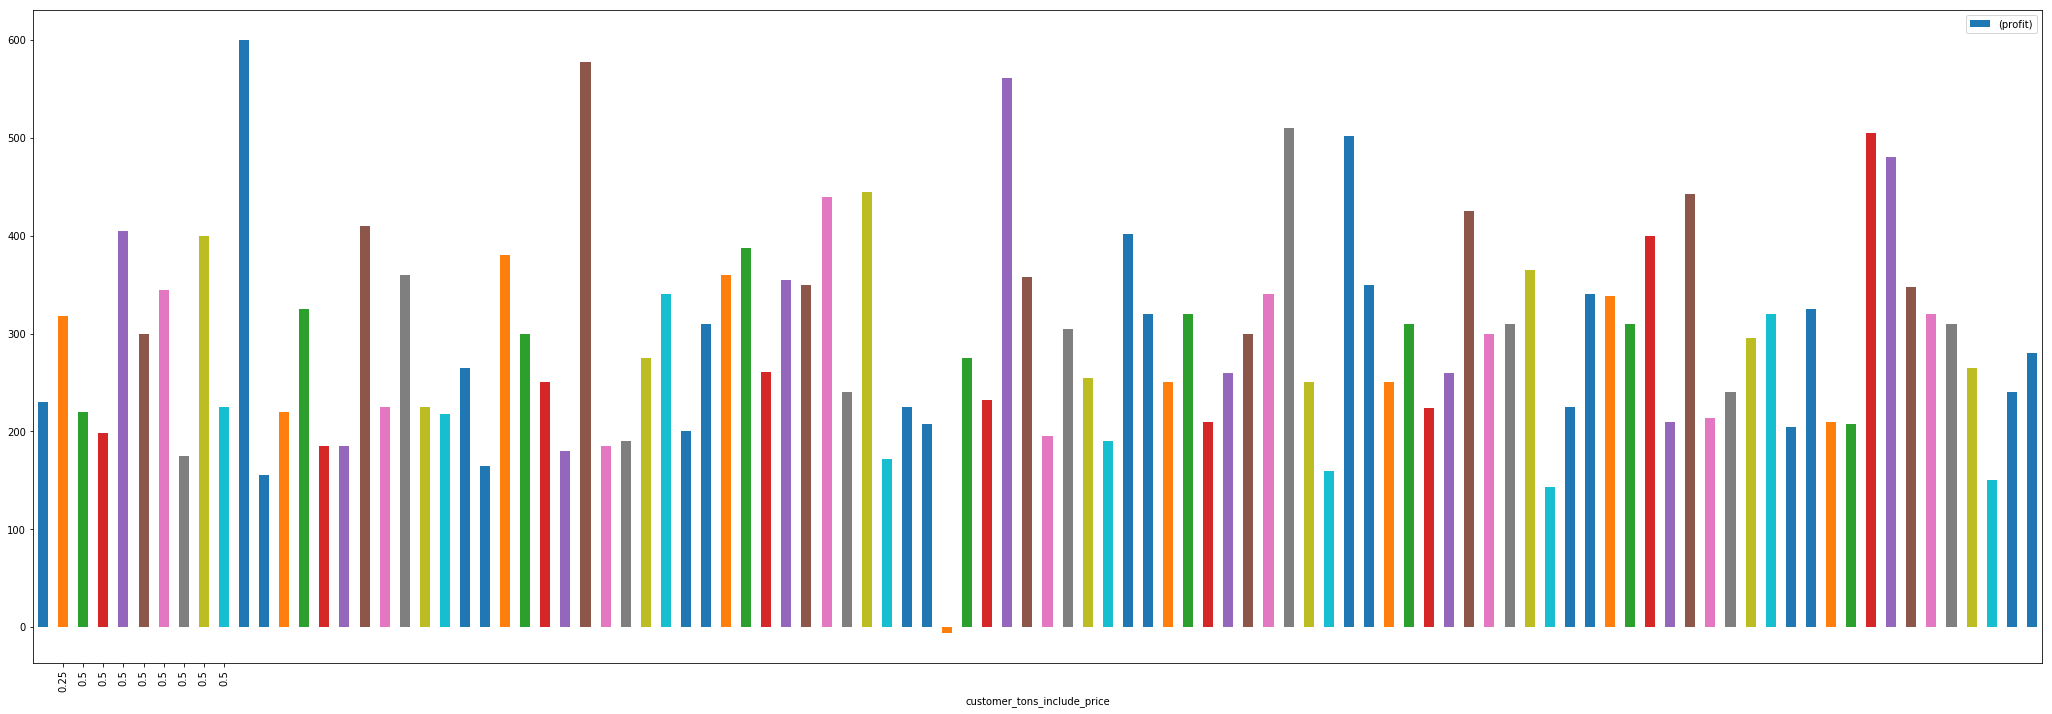

In [285]:
import matplotlib.pyplot as plt

plt_df[][:100].plot(x="customer_tons_include_price",y="(profit)",kind="bar",figsize=(36,12)  )
plt.xticks(range(1, 10))
plt.show()

In [254]:
plt_df.head()

,customer_tons_include_price,customer_container_size,customer_sub_total,price_haul,customer_waste,price_yards,(profit),(over_tonnage),price_price_deals,price_days_included
7709,0.25,20.0,480.0,250.00,Household,20.0,230.00,1.75,HT,14.0
25238,0.50,30.0,488.0,170.00,CandD,30.0,318.00,2.50,HT,30.0
1678,0.50,20.0,395.0,175.00,Household,20.0,220.00,1.50,HT,14.0
7416,0.50,15.0,398.0,200.00,Household,15.0,198.00,1.00,HT,21.0
7411,0.50,30.0,495.0,90.54,CandD,30.0,404.46,2.50,HT,NaN


In [304]:
newcols_df=my_df.loc[:,["(profit)","(over_tonnage)"]]

In [305]:
newcols_df.to_csv("newcols_df.csv")